<center><h2>COVID -19 Data Analysis</h2></center>
<strong>Source: </strong><a href='https://www.mohfw.gov.in/'>MoHFW, Govt. of India</a> <br>
<strong>Author:</strong> Pranay Saha<br>
<strong><a href='https://github.com/PranaySaha97'>GitHub</a></strong>&nbsp;
<strong><a href='https://www.linkedin.com/in/pranay-saha-42820011a/'>LinkedIN</a></strong>&nbsp;

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
covid_state_data= pd.read_html(io='https://www.mohfw.gov.in/')
covid_state_data=covid_state_data[0]
covid_state_data=covid_state_data.drop('S. No.', axis=1)

In [3]:
toDrop= covid_state_data.index[-5:]
covid_state_data=covid_state_data.drop(toDrop, axis=0)

In [4]:
covid_state_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Name of State / UT         36 non-null     object
 1   Total Confirmed cases*     36 non-null     object
 2   Cured/Discharged/Migrated  35 non-null     object
 3   Deaths**                   35 non-null     object
dtypes: object(4)
memory usage: 1.4+ KB


In [5]:
covid_state_data[covid_state_data['Name of State / UT']=='Tamil Nadu']

,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**
29,Tamil Nadu,17082,8731,118


In [6]:
covid_state_data['Cured/Discharged/Migrated'].fillna(0, axis=0, inplace= True)

In [7]:
covid_state_data['Deaths**'].fillna(0, inplace= True)

In [8]:
covid_state_data.replace(to_replace='0#', value='0', inplace=True)

In [9]:
covid_state_data['Total Confirmed cases*']= pd.to_numeric(covid_state_data['Total Confirmed cases*'])
covid_state_data['Cured/Discharged/Migrated']= pd.to_numeric(covid_state_data['Cured/Discharged/Migrated'])
covid_state_data['Deaths**']= pd.to_numeric(covid_state_data['Deaths**'])

In [46]:
covid_state_data.iloc[34]

Name of State / UT           West Bengal
Total Confirmed cases*              3816
Cured/Discharged/Migrated           1414
Deaths**                             278
Active Cases                        2402
Mortality Rate                   7.28512
Name: 34, dtype: object

In [11]:
covid_state_data.columns

Index(['Name of State / UT', 'Total Confirmed cases*',
       'Cured/Discharged/Migrated', 'Deaths**'],
      dtype='object')

In [12]:
covid_state_data['Active Cases']= covid_state_data['Total Confirmed cases*']-covid_state_data['Cured/Discharged/Migrated']

In [13]:
covid_state_data['Mortality Rate']= (covid_state_data['Deaths**']/covid_state_data['Total Confirmed cases*'])*100

In [14]:
covid_state_data.head()

,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**,Active Cases,Mortality Rate
0,Andaman and Nicobar Islands,33,33,0,0,0.000000
1,Andhra Pradesh,3110,1896,56,1214,1.800643
2,Arunachal Pradesh,2,1,0,1,0.000000
3,Assam,526,62,4,464,0.760456
4,Bihar,2730,749,13,1981,0.476190


### Total Cases in India

In [15]:
tot_cases= covid_state_data['Total Confirmed cases*'].sum()
tot_cases

145380

### Total Cured in India

In [16]:
tot_cured= covid_state_data['Cured/Discharged/Migrated'].sum()
tot_cured

60491

### Total Deaths In India

In [17]:
tot_deaths= covid_state_data['Deaths**'].sum()
tot_deaths

4167

### Total Number of States

In [18]:
no_of_states= covid_state_data['Name of State / UT'].nunique()-1
no_of_states

35

### Average Cases in India

In [19]:
avg_cases= tot_cases/no_of_states
avg_cases

4153.714285714285

### Average Cured in India

In [20]:
avg_cured= tot_cured/no_of_states
avg_cured

1728.3142857142857

### Average Deaths in India

In [21]:
avg_deaths= tot_deaths/no_of_states
avg_deaths

119.05714285714286

### Highest Confirmed Cases in India

In [22]:
covid_state_data[covid_state_data['Total Confirmed cases*']==covid_state_data['Total Confirmed cases*'].max()]

,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**,Active Cases,Mortality Rate
19,Maharashtra,52667,15786,1695,36881,3.218334


### Lowest Confirmed Cases in India

In [23]:
covid_state_data[covid_state_data['Total Confirmed cases*']==covid_state_data['Total Confirmed cases*'].min()]

,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**,Active Cases,Mortality Rate
22,Mizoram,1,1,0,0,0.0
28,Sikkim,1,0,0,1,0.0


### Top 5 States Having Most Cases in India

In [24]:
# Top 5
sorted_total_cnf= covid_state_data.sort_values(by=['Total Confirmed cases*'], ascending=False)
sorted_total_cnf.head()

,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**,Active Cases,Mortality Rate
19,Maharashtra,52667,15786,1695,36881,3.218334
29,Tamil Nadu,17082,8731,118,8351,0.690786
10,Gujarat,14460,6636,888,7824,6.141079
8,Delhi,14053,6771,276,7282,1.963993
27,Rajasthan,7300,3951,167,3349,2.287671


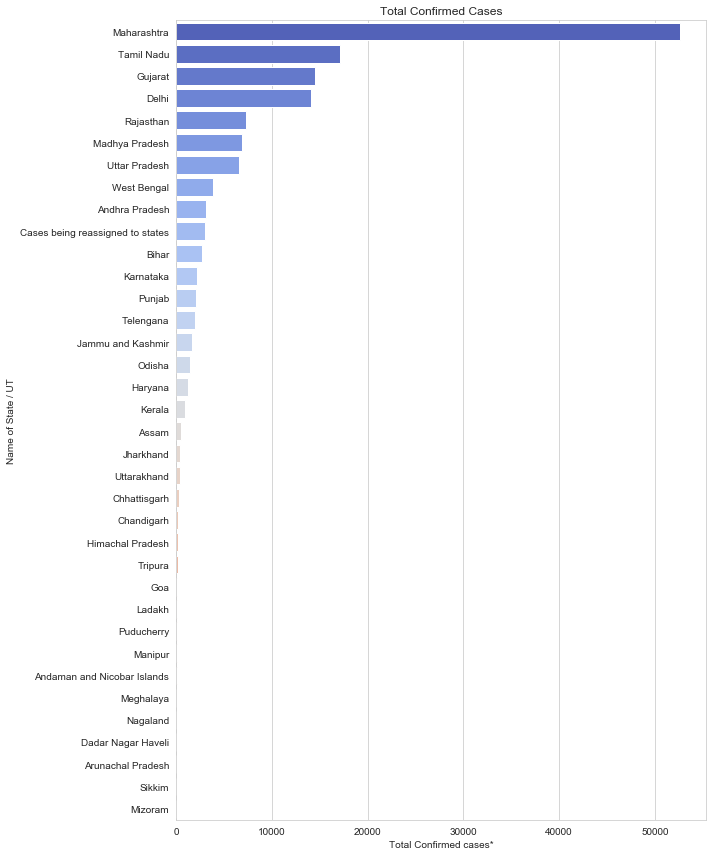

In [25]:
plt.figure(figsize=(10, 12))
sns.set_style('whitegrid')
sns.barplot(x='Total Confirmed cases*', y='Name of State / UT', data= sorted_total_cnf, palette='coolwarm')
plt.title('Total Confirmed Cases')
plt.tight_layout()

### Highest Cured Cases in India

In [26]:
covid_state_data[covid_state_data['Cured/Discharged/Migrated']==covid_state_data['Cured/Discharged/Migrated'].max()]

,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**,Active Cases,Mortality Rate
19,Maharashtra,52667,15786,1695,36881,3.218334


### Lowest Cured Cases in India

In [27]:
covid_state_data[covid_state_data['Cured/Discharged/Migrated']==covid_state_data['Cured/Discharged/Migrated'].min()]

,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**,Active Cases,Mortality Rate
7,Dadar Nagar Haveli,2,0,0,2,0.0
23,Nagaland,3,0,0,3,0.0
28,Sikkim,1,0,0,1,0.0
35,Cases being reassigned to states,2970,0,0,2970,0.0


### Top 5 States with Cured Cases in India

In [28]:
# Top 5
sorted_total_cured= covid_state_data.sort_values(by=['Cured/Discharged/Migrated'], ascending=False)
sorted_total_cured.head()

,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**,Active Cases,Mortality Rate
19,Maharashtra,52667,15786,1695,36881,3.218334
29,Tamil Nadu,17082,8731,118,8351,0.690786
8,Delhi,14053,6771,276,7282,1.963993
10,Gujarat,14460,6636,888,7824,6.141079
27,Rajasthan,7300,3951,167,3349,2.287671


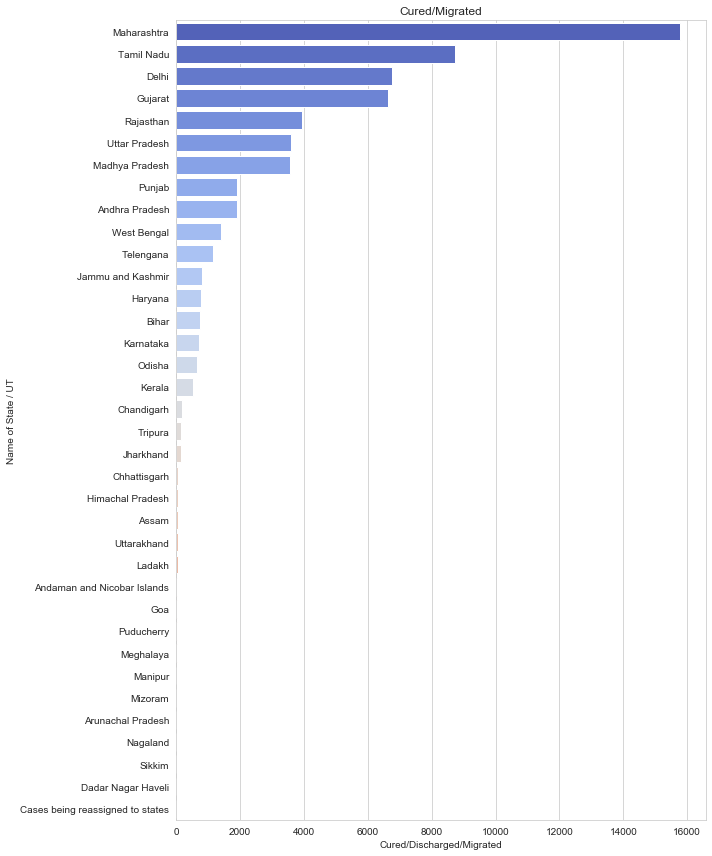

In [29]:
plt.figure(figsize=(10,12))
sns.set_style('whitegrid')
sns.barplot(x='Cured/Discharged/Migrated', y='Name of State / UT', data= sorted_total_cured, palette='coolwarm')
plt.title('Cured/Migrated')
plt.tight_layout()

### Highest Death Cases in India

In [30]:
covid_state_data[covid_state_data['Deaths**']==covid_state_data['Deaths**'].max()]

,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**,Active Cases,Mortality Rate
19,Maharashtra,52667,15786,1695,36881,3.218334


### Lowest Death Cases in India

In [31]:
covid_state_data[covid_state_data['Deaths**']==covid_state_data['Deaths**'].min()]

,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**,Active Cases,Mortality Rate
0,Andaman and Nicobar Islands,33,33,0,0,0.0
2,Arunachal Pradesh,2,1,0,1,0.0
6,Chhattisgarh,291,72,0,219,0.0
7,Dadar Nagar Haveli,2,0,0,2,0.0
9,Goa,67,19,0,48,0.0
17,Ladakh,52,43,0,9,0.0
20,Manipur,39,4,0,35,0.0
22,Mizoram,1,1,0,0,0.0
23,Nagaland,3,0,0,3,0.0
25,Puducherry,41,12,0,29,0.0


### Top 5 States having most Death Cases in India

In [32]:
# Top 5
sorted_total_deaths= covid_state_data.sort_values(by=['Deaths**'], ascending=False)
sorted_total_deaths.head()

,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**,Active Cases,Mortality Rate
19,Maharashtra,52667,15786,1695,36881,3.218334
10,Gujarat,14460,6636,888,7824,6.141079
18,Madhya Pradesh,6859,3571,300,3288,4.373815
34,West Bengal,3816,1414,278,2402,7.285115
8,Delhi,14053,6771,276,7282,1.963993


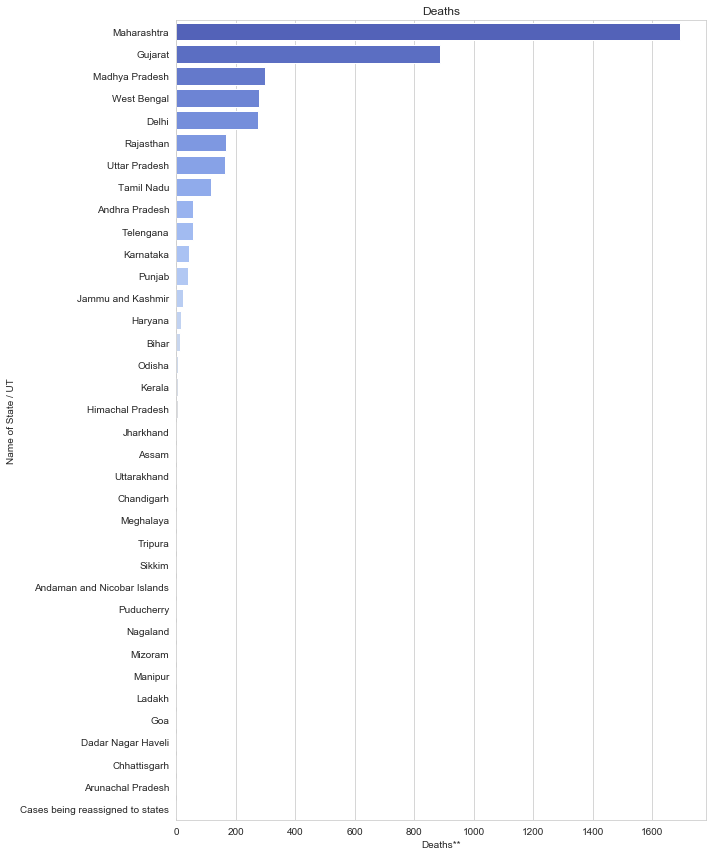

In [33]:
plt.figure(figsize=(10,12))
sns.set_style('whitegrid')
sns.barplot(x='Deaths**', y='Name of State / UT', data= sorted_total_deaths, palette='coolwarm')
plt.title('Deaths')
plt.tight_layout()

### Highest Active Cases in India

In [34]:
covid_state_data[covid_state_data['Active Cases']==covid_state_data['Active Cases'].max()]

,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**,Active Cases,Mortality Rate
19,Maharashtra,52667,15786,1695,36881,3.218334


### Lowest Active Cases in India

In [35]:
covid_state_data[covid_state_data['Active Cases']==covid_state_data['Active Cases'].min()]

,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**,Active Cases,Mortality Rate
0,Andaman and Nicobar Islands,33,33,0,0,0.0
22,Mizoram,1,1,0,0,0.0


### Top 5 States having most Active Cases in India

In [36]:
# Top 5
sorted_total_active= covid_state_data.sort_values(by=['Active Cases'], ascending=False)
sorted_total_active.head()

,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**,Active Cases,Mortality Rate
19,Maharashtra,52667,15786,1695,36881,3.218334
29,Tamil Nadu,17082,8731,118,8351,0.690786
10,Gujarat,14460,6636,888,7824,6.141079
8,Delhi,14053,6771,276,7282,1.963993
27,Rajasthan,7300,3951,167,3349,2.287671


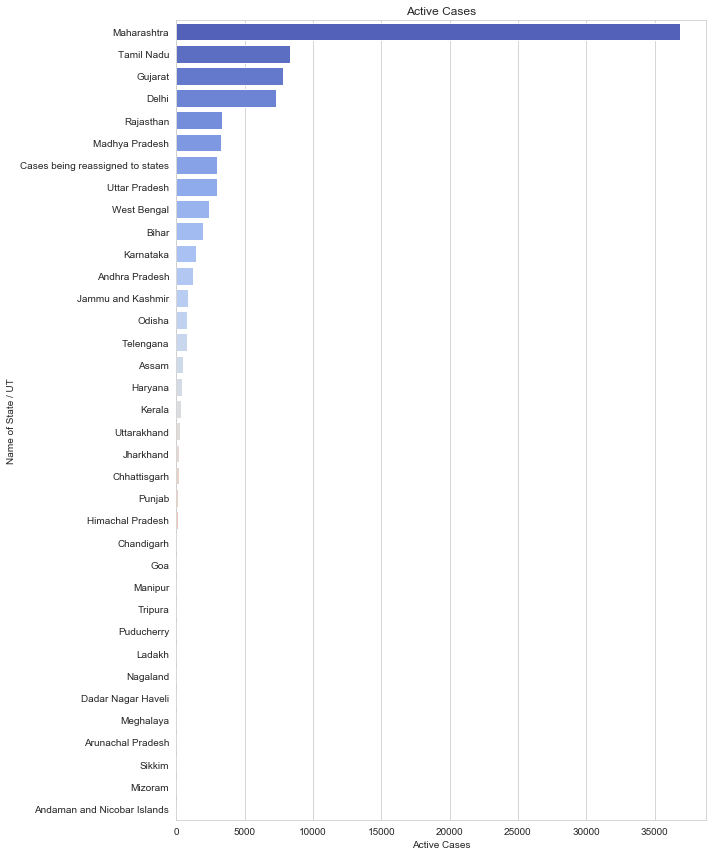

In [37]:
plt.figure(figsize=(10,12))
sns.set_style('whitegrid')
sns.barplot(x='Active Cases', y='Name of State / UT', data= sorted_total_active, palette='coolwarm')
plt.title('Active Cases')
plt.tight_layout()

### Highest Mortality Rate in India

In [38]:
covid_state_data[covid_state_data['Mortality Rate']==covid_state_data['Mortality Rate'].max()]

,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**,Active Cases,Mortality Rate
34,West Bengal,3816,1414,278,2402,7.285115


### Lowest Mortality Rate in India

In [39]:
covid_state_data[covid_state_data['Mortality Rate']==covid_state_data['Mortality Rate'].min()]

,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**,Active Cases,Mortality Rate
0,Andaman and Nicobar Islands,33,33,0,0,0.0
2,Arunachal Pradesh,2,1,0,1,0.0
6,Chhattisgarh,291,72,0,219,0.0
7,Dadar Nagar Haveli,2,0,0,2,0.0
9,Goa,67,19,0,48,0.0
17,Ladakh,52,43,0,9,0.0
20,Manipur,39,4,0,35,0.0
22,Mizoram,1,1,0,0,0.0
23,Nagaland,3,0,0,3,0.0
25,Puducherry,41,12,0,29,0.0


### Top 5 States having high Mortality Rate in India

In [40]:
# Top 5
sorted_total_mort= covid_state_data.sort_values(by=['Mortality Rate'], ascending=False)
sorted_total_mort.head()

,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**,Active Cases,Mortality Rate
34,West Bengal,3816,1414,278,2402,7.285115
21,Meghalaya,14,12,1,2,7.142857
10,Gujarat,14460,6636,888,7824,6.141079
18,Madhya Pradesh,6859,3571,300,3288,4.373815
19,Maharashtra,52667,15786,1695,36881,3.218334


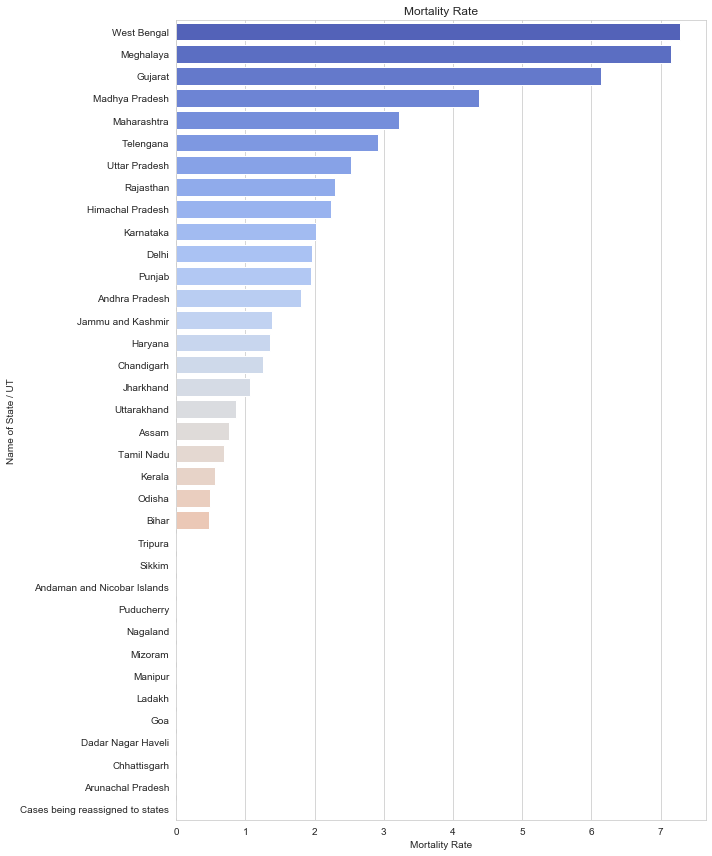

In [41]:
plt.figure(figsize=(10,12))
sns.set_style('whitegrid')
sns.barplot(x='Mortality Rate', y='Name of State / UT', data= sorted_total_mort, palette='coolwarm')
plt.title('Mortality Rate')
plt.tight_layout()

### Correlation Data

In [42]:
covid_cor= covid_state_data.corr()
covid_cor

,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**,Active Cases,Mortality Rate
Total Confirmed cases*,1.000000,0.964441,0.934119,0.990761,0.300563
Cured/Discharged/Migrated,0.964441,1.000000,0.879287,0.919688,0.349926
Deaths**,0.934119,0.879287,1.000000,0.936581,0.449869
Active Cases,0.990761,0.919688,0.936581,1.000000,0.266973
Mortality Rate,0.300563,0.349926,0.449869,0.266973,1.000000


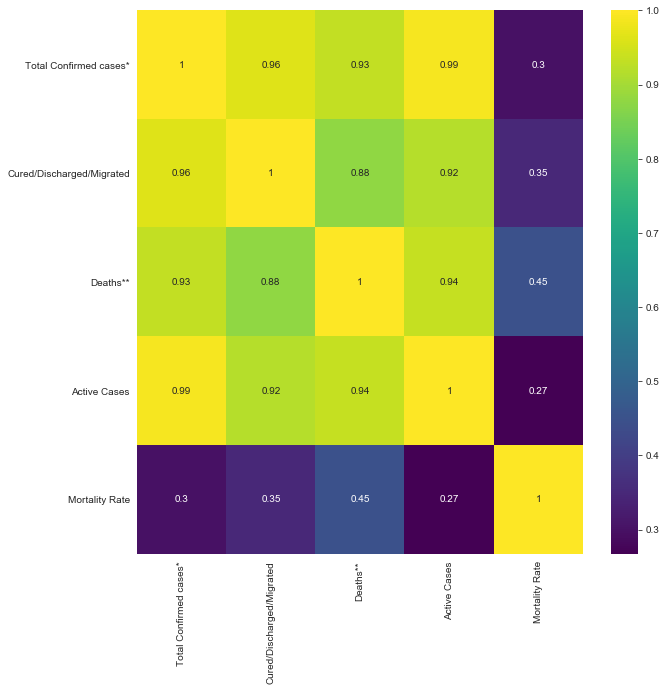

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(covid_cor, cmap='viridis', annot=True)

<Figure size 720x720 with 0 Axes>

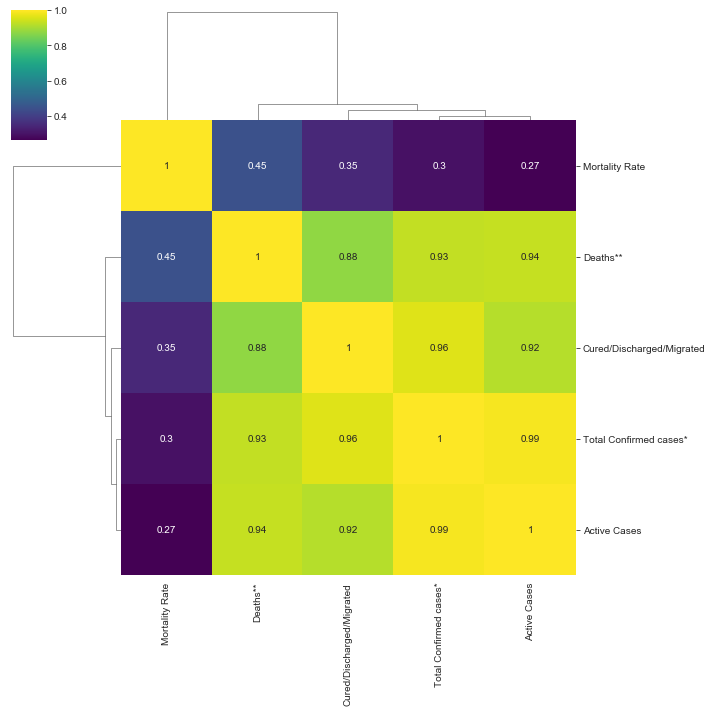

In [44]:
plt.figure(figsize=(10,10))
sns.clustermap(covid_cor, cmap='viridis', annot=True)